/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Customer Name   1000 non-null   object        
 6   Email           794 non-null    object        
 7   Phone Number    865 non-null    object        
 8   Address Line 1  1000 non-null   object        
 9   City            1000 non-null   object        
 10  Country         1000 non-null   object        
 11  Postcode        1000 non-null   object        
 12  Loyalty Card    1000 non-null   object        
 13  Coffee Type     1000 non-null   object        
 14 

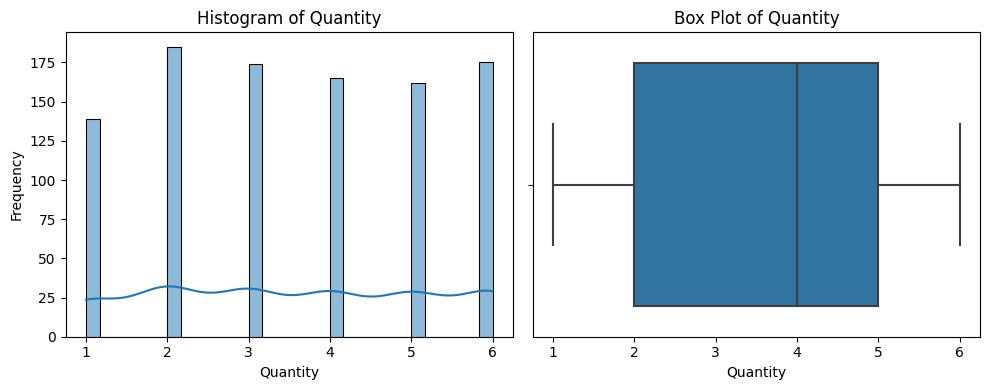

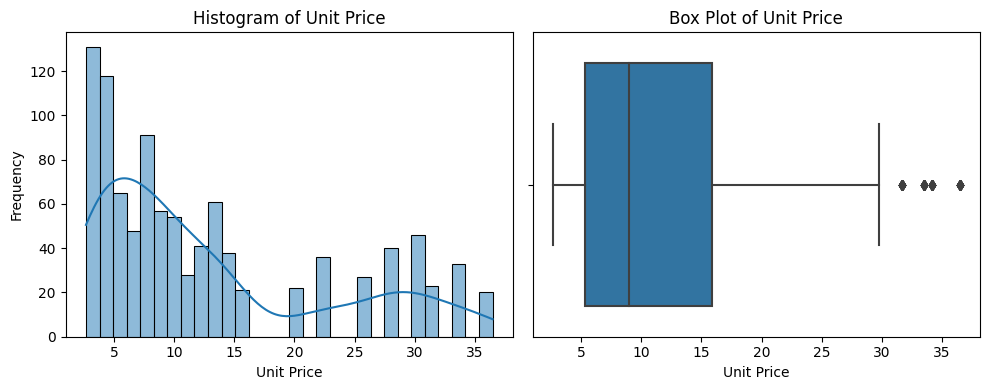

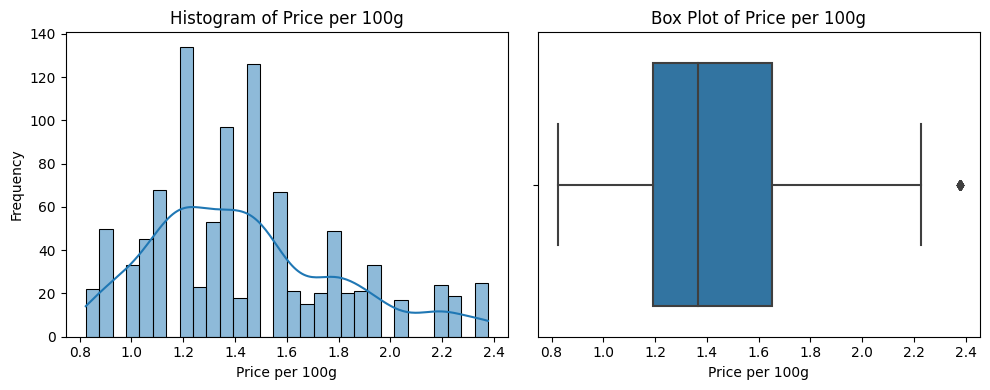

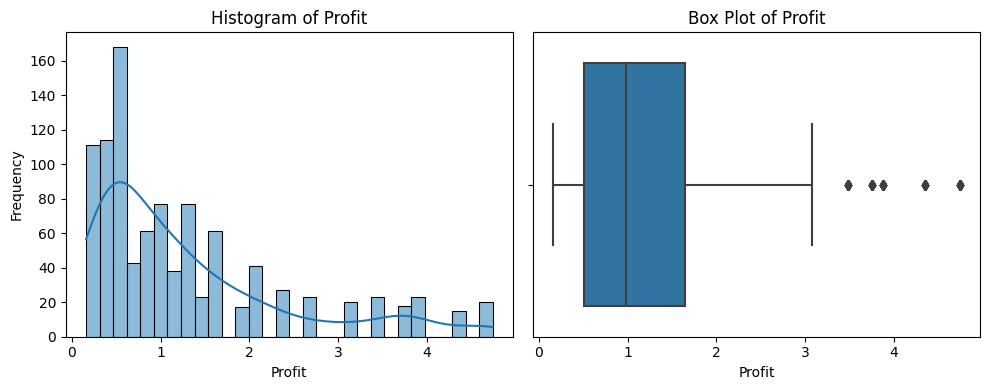

Summary Statistics for Numerical Variables:
          Quantity   Unit Price  Price per 100g       Profit
count  1000.000000  1000.000000     1000.000000  1000.000000
mean      3.551000    12.908080        1.438336     1.301375
std       1.681733     9.772455        0.365525     1.128052
min       1.000000     2.685000        0.823400     0.161100
25%       2.000000     5.370000        1.191400     0.505050
50%       4.000000     8.950000        1.366200     0.980100
75%       5.000000    15.850000        1.650000     1.649100
max       6.000000    36.455000        2.377500     4.739150


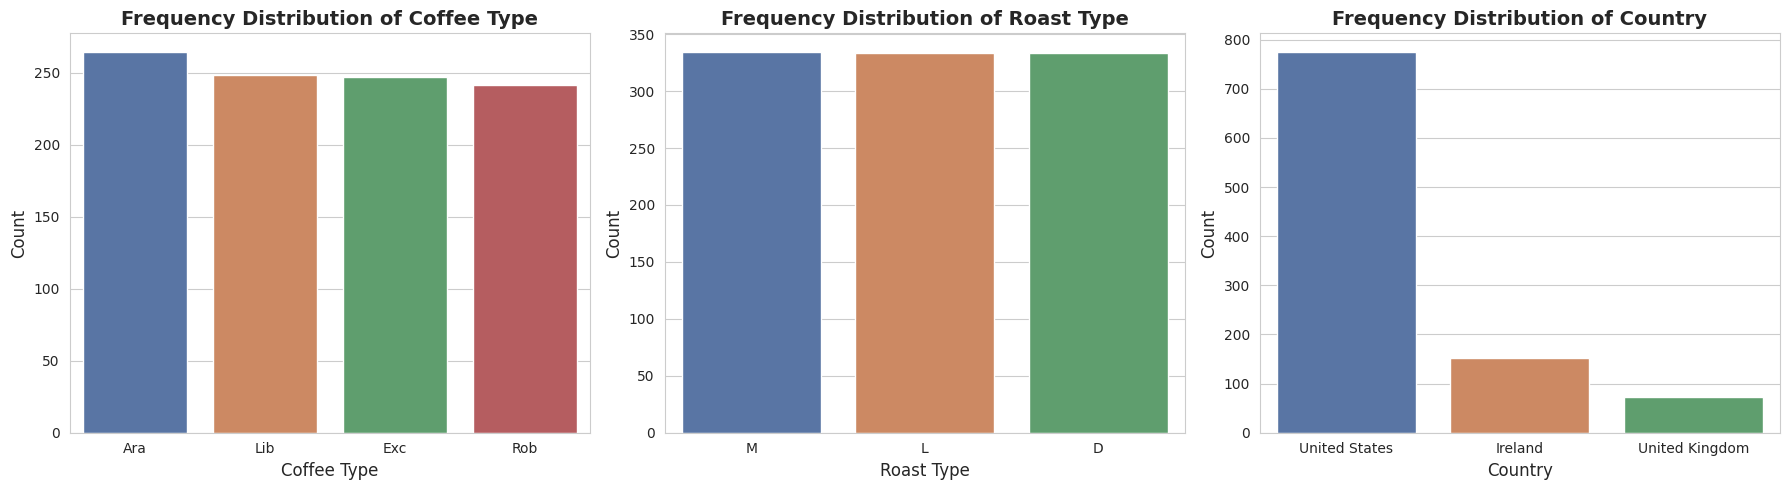

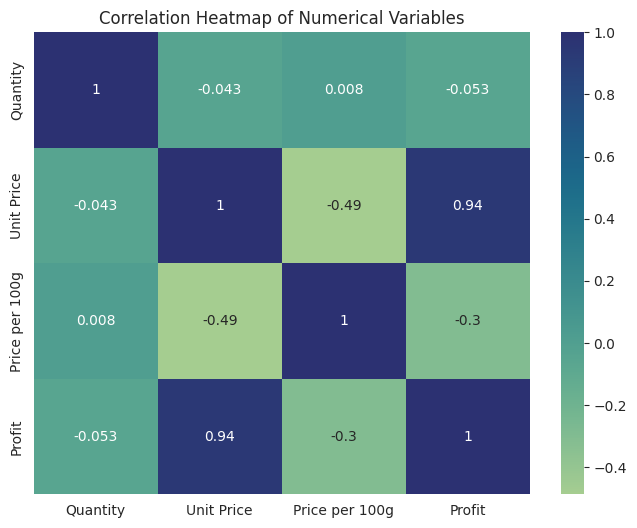

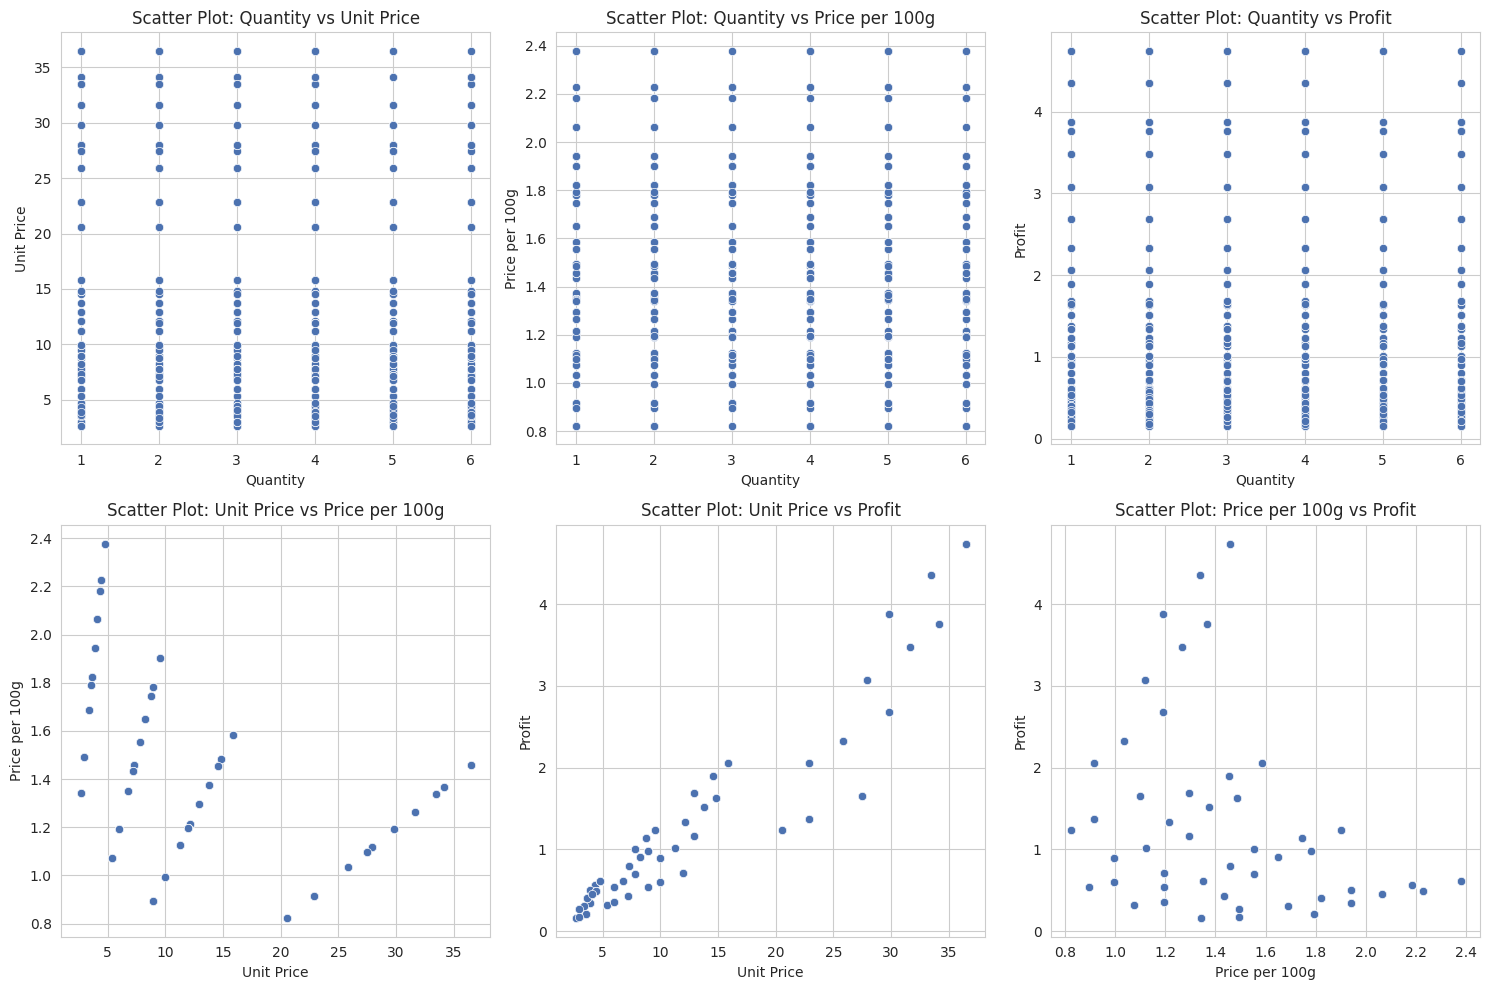

Cross-tabulation between Coffee Type and Country:
Country      Ireland  United Kingdom  United States
Coffee Type                                        
Ara               41               7            216
Exc               35              23            189
Lib               39              21            188
Rob               38              22            181


Cross-tabulation between Roast Type and Country:
Country     Ireland  United Kingdom  United States
Roast Type                                        
D                66              19            248
L                48              26            259
M                39              28            267




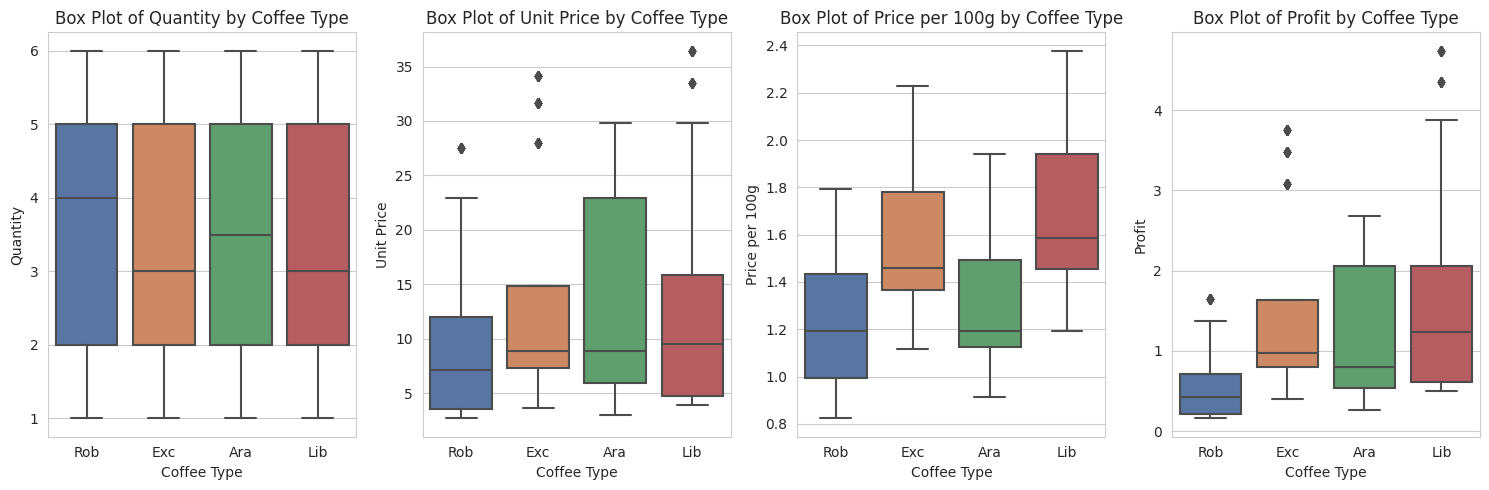

Chi-square test between Coffee Type and Roast Type:
Chi2: 4.7541, p-value: 0.5757, Degrees of Freedom: 6
Expected frequencies:
 [[87.912 87.912 88.176]
 [82.251 82.251 82.498]
 [82.584 82.584 82.832]
 [80.253 80.253 80.494]]


Chi-square test between Roast Type and Coffee Type:
Chi2: 4.7541, p-value: 0.5757, Degrees of Freedom: 6
Expected frequencies:
 [[87.912 82.251 82.584 80.253]
 [87.912 82.251 82.584 80.253]
 [88.176 82.498 82.832 80.494]]




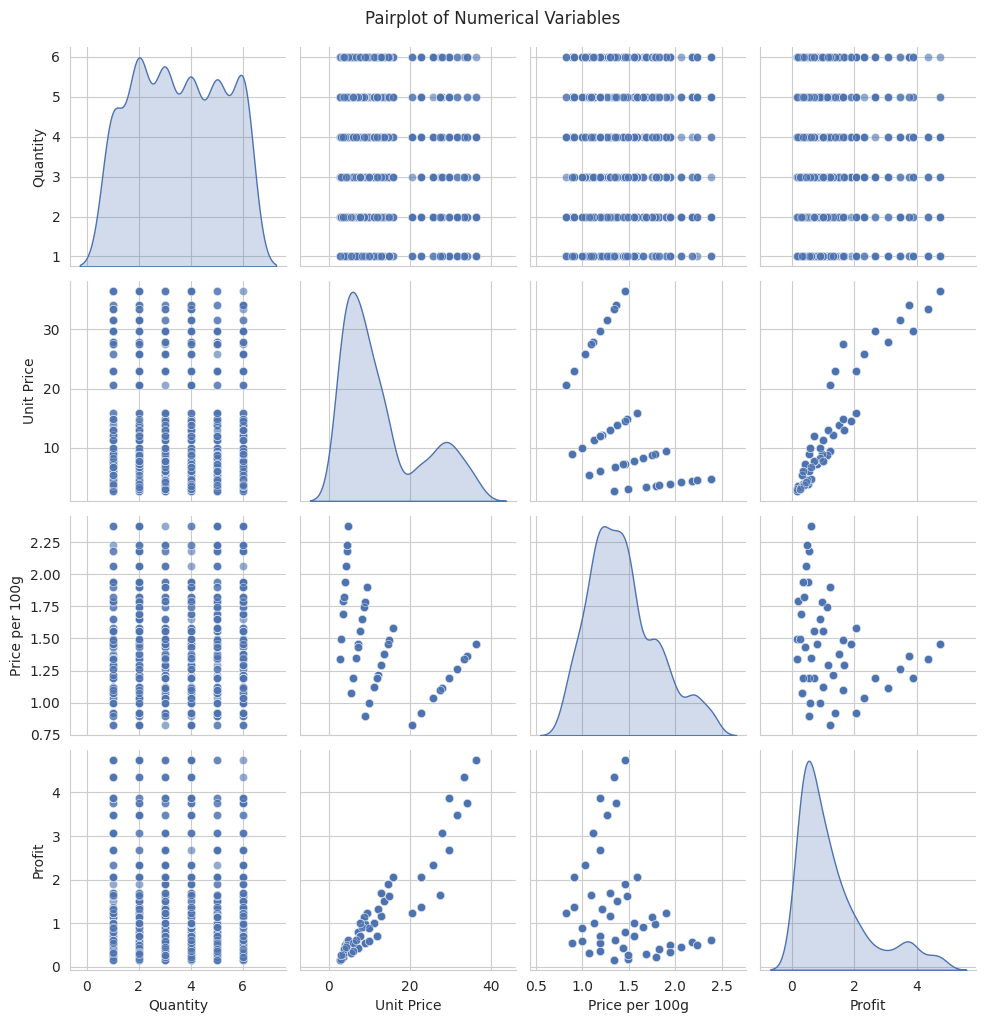

Grouped Analysis - Mean of Numerical Variables by Coffee Type and Roast Type:
   Coffee Type Roast Type  Quantity  Unit Price  Price per 100g    Profit
0          Ara          D  3.616279    9.707035        1.185901  0.873633
1          Ara          L  3.564103   14.610256        1.471983  1.314923
2          Ara          M  3.580000   12.667500        1.252575  1.140075
3          Exc          D  3.414634   12.505610        1.410585  1.375617
4          Exc          L  3.938272   15.015000        1.717100  1.651650
5          Exc          M  3.250000   15.321429        1.552768  1.685357
6          Lib          D  3.282353   14.214529        1.468073  1.847889
7          Lib          L  3.528736   15.868218        1.860098  2.062868
8          Lib          M  3.526316   13.535329        1.738342  1.759593
9          Rob          D  3.575000    9.308000        1.061022  0.558480
10         Rob          L  3.747126   12.032414        1.401034  0.721945
11         Rob          M  3.59459

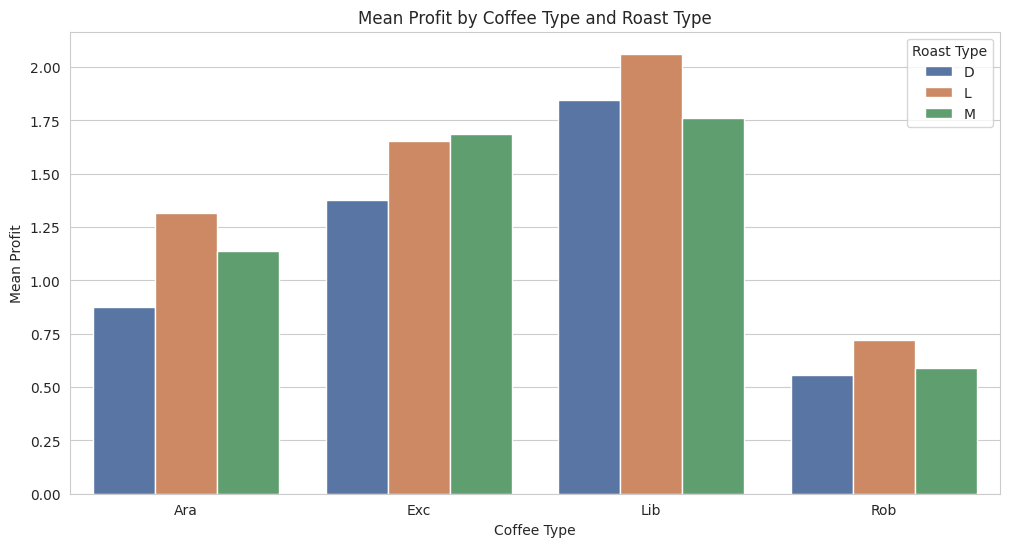

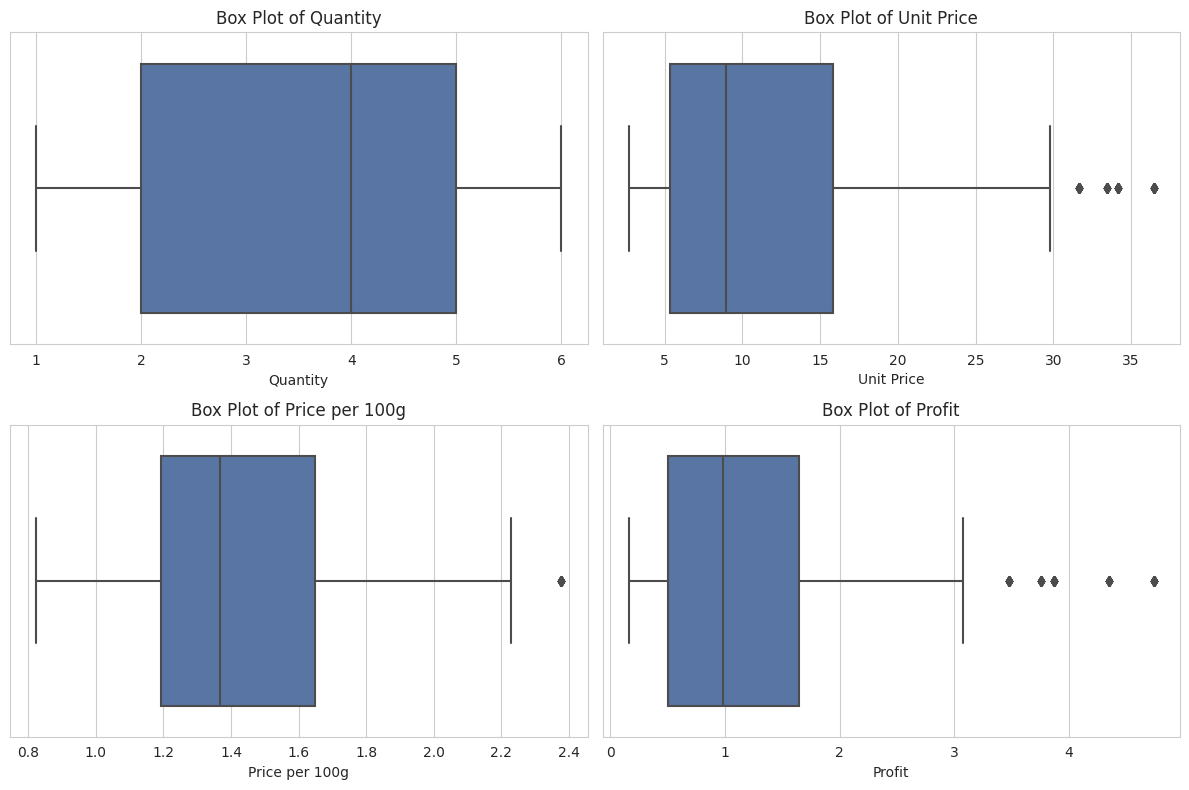

Column: Quantity
Lower_limit: -1.494200198708178
Upper_limit: 8.596200198708178
Number of outliers: 0

Column: Unit Price
Lower_limit: -16.40928611597942
Upper_limit: 42.225446115979416
Number of outliers: 0

Column: Price per 100g
Lower_limit: 0.3417609973380662
Upper_limit: 2.5349104026619336
Number of outliers: 0

Column: Profit
Lower_limit: -2.0827806742591557
Upper_limit: 4.685530774259156
Number of outliers: 20

T-statistic: -11.983560182300126
P-value: 9.258583295703738e-28
Reject the null hypothesis: There is a significant difference between the two groups.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis and tests
import scipy.stats as stats
from scipy.stats import chi2_contingency

# For decomposing time series into trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
orders = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx",sheet_name = 'orders')
products = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx", sheet_name ='products')
customers = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx", sheet_name = 'customers')
# Drop null columns in orders dataset
null_col = ['Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type',
       'Size', 'Unit Price', 'Sales']
orders.drop(null_col, axis=1 ,inplace =True)
# Merge Orders with Customers on 'Customer ID'
merged = pd.merge(orders, customers, on='Customer ID', how='inner')
# Merge the result with Products on 'Product ID'
sales = pd.merge(merged, products, on='Product ID', how='inner')

# Display first few rows of the dataset
sales.head()
# Get basic information about the data
sales.info()
# Get descriptive statistic about the data
sales.describe(include='all')
# Handle missing values
sales.isnull().sum()
# Remove duplicates
sales.duplicated().sum()
# Drop irrelevant columns from the dataset
columns_to_drop = ['Email', 'Phone Number', 'Address Line 1', 'City', 'Postcode']

sales = sales.drop(columns=columns_to_drop)

# Numerical columns to analyze
numerical_columns = ['Quantity', 'Unit Price', 'Price per 100g', 'Profit']

for col in numerical_columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(sales[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)  
    sns.boxplot(x=sales[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
     # Display the plots
    plt.tight_layout()
    plt.show()
    # Display summary statistics
print("Summary Statistics for Numerical Variables:")
print(sales[numerical_columns].describe())
# Categorical columns to analyze
categorical_columns = ['Coffee Type', 'Roast Type', 'Country']

sns.set_palette("deep")
sns.set_style("whitegrid")

# Plot bar plots for categorical variables
plt.figure(figsize=(18,5))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=sales[col], order=sales[col].value_counts().index)
    plt.title(f'Frequency Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()    
plt.show()
# Calculate the correlation matrix
correlation_matrix = sales[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Create scatter plots for pairs of numerical variables
plt.figure(figsize=(15, 10))

plot_number = 1

for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i < j:
            plt.subplot(2, 3, plot_number)
            sns.scatterplot(x=sales[col1], y=sales[col2])
            plt.title(f'Scatter Plot: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plot_number += 1

plt.tight_layout()
plt.show()

# Categorical columns to analyze
cat_columns = ['Coffee Type', 'Roast Type']
# Cross-tabulations
for cat_col in cat_columns:
    crosstab = pd.crosstab(sales[cat_col], sales['Country'])
    print(f'Cross-tabulation between {cat_col} and Country:')
    print(crosstab)
    print('\n')
    
    # Box plots to compare the distribution of numerical variables across different categories
plt.figure(figsize=(15,5))
for i, num_col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(x='Coffee Type', y=num_col, data=sales)
    plt.title(f'Box Plot of {num_col} by Coffee Type')
    plt.xlabel('Coffee Type')
    plt.ylabel(num_col)

plt.tight_layout()
plt.show()

# Perform Chi-square tests for association between categorical variables
for cat_col1 in cat_columns:
    for cat_col2 in cat_columns:
        if cat_col1 != cat_col2:
            contingency_table = pd.crosstab(sales[cat_col1], sales[cat_col2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            print(f"Chi-square test between {cat_col1} and {cat_col2}:")
            print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")
            print("Expected frequencies:\n", ex)
            print("\n")
            
            # Pairplot to visualize pairwise relationships
sns.pairplot(sales[numerical_columns], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()
# Analyze combined effects of 'Coffee Type', 'Roast Type', and numerical variables
# Group by 'Coffee Type' and 'Roast Type' and calculate the mean of numerical variables
grouped_analysis = sales.groupby(['Coffee Type', 'Roast Type'])[numerical_columns].mean().reset_index()

print("Grouped Analysis - Mean of Numerical Variables by Coffee Type and Roast Type:")
print(grouped_analysis)

# Visualize grouped analysis
plt.figure(figsize=(12,6))
sns.barplot(x='Coffee Type', y='Profit', hue='Roast Type', data=grouped_analysis)
plt.title('Mean Profit by Coffee Type and Roast Type')
plt.xlabel('Coffee Type')
plt.ylabel('Mean Profit')
plt.legend(title='Roast Type')
plt.show()
# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=sales[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    num_outliers = outliers.shape[0]

    print(f"Column: {col}")
    print(f"Lower_limit: {lower_limit}")
    print(f"Upper_limit: {upper_limit}")
    print(f"Number of outliers: {num_outliers}\n")
    
    # Function to detect outliers using the Z-score method and provide summary
def zscore_outliers_summary(data, col, threshold=3):
    z_scores = np.abs(stats.zscore(data[col].dropna()))
    lower_limit = data[col].mean() - threshold * data[col].std()
    upper_limit = data[col].mean() + threshold * data[col].std()
    num_outliers = (z_scores > threshold).sum()
    
    print(f"Column: {col}")
    print(f"Lower_limit: {lower_limit}")
    print(f"Upper_limit: {upper_limit}")
    print(f"Number of outliers: {num_outliers}\n")

# Apply the function to each numerical column
for col in numerical_columns:
    zscore_outliers_summary(sales, col)

   

import pandas as pd
import scipy.stats as stats

# Define the two groups for comparison
group1 = sales[sales['Coffee Type'] == 'Rob']['Profit']  # Replace 'Type1' with your first coffee type
group2 = sales[sales['Coffee Type'] == 'Exc']['Profit']  # Replace 'Type2' with your second coffee type

# Step 4: Perform the t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Use equal_var=False if variances are unequal

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Step 5: Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups.")


   


    